# Spectral Analysis of U and V

In [159]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import netcdf

In [160]:
fpath = '/gscratch/jisao/mclaret/GL64/'
gridU_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k1.nc','r')
gridV_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k1.nc','r')
gridU_k58 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k58.nc','r')
gridV_k58 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k58.nc','r')

In [161]:
# verify data shapes
if gridU_k1.variables['vozocrtx'].shape == gridV_k1.variables['vomecrty'].shape:
    print('k1 component shapes match.')
else:
    print('k1 component shapes do not match.')

if gridU_k58.variables['vozocrtx'].shape == gridV_k58.variables['vomecrty'].shape:
    print('k58 component shapes match.')
else:
    print('k58 component shapes do not match.')

k1 component shapes match.
k58 component shapes match.


In [162]:
# coordinates to focus on
#x=250; y=50; it0=0; it1=3648-1
#x=275; y=48; it0=2500; it1=3500  # S1 eddy
#x=275; y=48; it0=0; it1=3648-1  # S1 eddy
#x=321; y=100; it0=0; it1=500 # S2 eddy
x=321; y=100; it0=0; it1=3648-1 # S2 eddy
#x=347; y=54; it0=0; it1=3648-1  # S3 eddy

# variables at k=1
nav_lon = gridU_k1.variables['nav_lon'][y-1, x-1].copy()  # zonal velocities at time zero
nav_lat = gridU_k1.variables['nav_lat'][y-1, x-1].copy()  # zonal velocities at time zero
U_t0_k1 = gridU_k1.variables['vozocrtx'][it0:it1, 0, y-1, x-1].copy()  # zonal velocities at time zero
V_t0_k1 = gridV_k1.variables['vomecrty'][it0:it1, 0, y-1, x-1].copy()  # meridional velocities at time zero

# variables at k=58
U_t0_k58 = gridU_k58.variables['vozocrtx'][it0:it1, 0, y-1, x-1].copy()  # zonal velocities at time zero
V_t0_k58 = gridV_k58.variables['vomecrty'][it0:it1, 0, y-1, x-1].copy()  # meridional velocities at time zero

gridU_k1.close()
gridV_k1.close()
gridU_k58.close()
gridV_k58.close()

In [163]:
maxt = len(U_t0_k1)
dt = 1.0  # 1-hour resolution
T = (maxt-1)*dt
times = np.arange(1,maxt+1,1) * 1.0
print('maxt = ', maxt)
#print('times = ', times)

maxt =  3647


In [164]:
omega = 7.2921e-5
fCor = 2.*omega*np.sin((nav_lat)/180*np.pi)  # radians/sec
Tip = ((1./fCor) / 3600) * (2*np.pi)  # hours/cycle

print('fCor =', fCor)
print('Tip =', Tip)

fCor = 9.910805378047207e-05
Tip = 17.610367527348455


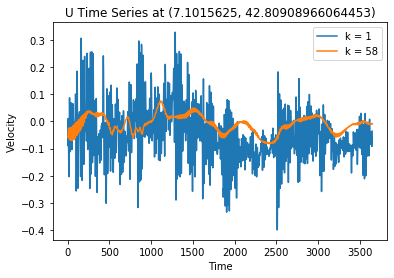

In [165]:
# plot time series of U
plt.figure()
plt.plot(times, U_t0_k1, label='k = 1')
plt.plot(times, U_t0_k58, label='k = 58')
#plt.xlim(0,400)

# plot labels
plt.title('U Time Series at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Time')
plt.ylabel('Velocity')
#plt.xlim(2500,3500)
#plt.ylim(-0.1,0.1)
plt.legend()
plt.show()


1.014032679117953 1.014032679117953


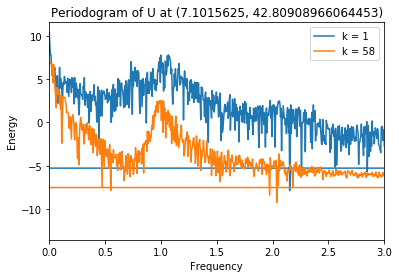

In [166]:
# find amplitudes of Fourier coefficients
fc_U_k1 = np.fft.fft(U_t0_k1)                    # k1 Fourier coefficients (FCs)
amp_U_k1 = fc_U_k1.real**2 + fc_U_k1.imag**2     # amplitude of k1 FCs
fc_U_k58 = np.fft.fft(U_t0_k58)                  # k58 FCs
amp_U_k58 = fc_U_k58.real**2 + fc_U_k58.imag**2  # amplitude of k58 FCs

fq_U = np.fft.fftfreq(times.shape[-1])        # frequencies corresponding to each FC (cycles/h)
fq_U_norm=fq_U*2*np.pi/fCor/3600
fq_U *= (2.*np.pi) / fCor / 3600
#fq_U /= Tip
print(fq_U_norm[210], fq_U[210])

# plot periodogram of U
plt.figure(1)
plt.plot(fq_U_norm, np.log(amp_U_k1), label='k = 1')
plt.plot(fq_U_norm, np.log(amp_U_k58), label='k = 58')
plt.xlim(0,3)
#plt.ylim(0,35000)

# plot labels
plt.title('Periodogram of U at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Frequency')
plt.ylabel('Energy')
plt.legend()
plt.show()

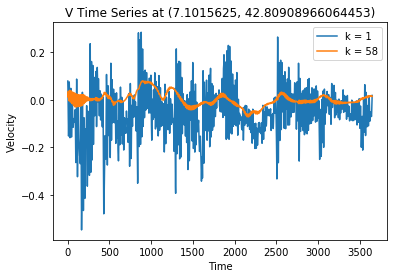

In [167]:
# plot time series of V
plt.figure()
plt.plot(times, V_t0_k1, label='k = 1')
plt.plot(times, V_t0_k58, label='k = 58')
#plt.xlim(0,400)

# plot labels
plt.title('V Time Series at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()

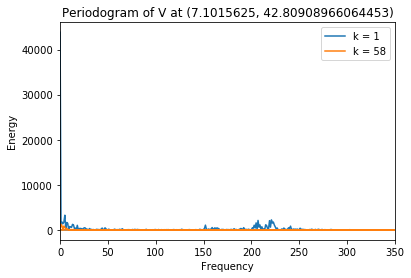

In [168]:
# find amplitudes of Fourier coefficients
fc_V_k1 = np.fft.fft(V_t0_k1)                    # k1 Fourier coefficients (FCs)
amp_V_k1 = fc_V_k1.real**2 + fc_V_k1.imag**2     # amplitude of k1 FCs
fc_V_k58 = np.fft.fft(V_t0_k58)                  # k58 FCs
amp_V_k58 = fc_V_k58.real**2 + fc_V_k58.imag**2  # amplitude of k58 FCs

fq_V = np.fft.fftfreq(times.shape[-1],dt)        # frequencies corresponding to each FC (cycles/h)

# plot periodogram of V
plt.figure(2)
plt.plot(fq_V*T, amp_V_k1, label='k = 1')
plt.plot(fq_V*T, amp_V_k58, label='k = 58')
plt.xlim(0, 350)

# plot labels
plt.title('Periodogram of V at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Frequency')
plt.ylabel('Energy')
plt.legend()
plt.show()